<a href="https://colab.research.google.com/github/knoppin1/DATA-606/blob/main/county_population_density.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import wget
import missingno as msno
import pickle

## 1 - Read Population Data

In [ ]:
url = 'https://www.ers.usda.gov/webdocs/DataFiles/48747/PopulationEstimates.xls'
population_file = wget.download(url)

Read the population data into a dataframe.

In [ ]:
pop_df = pd.read_excel(population_file)
pop_df.head(3)

,"Population estimates for the U.S., States, and counties, 2010-19 (see the second tab in this workbook for variable name descriptions)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164
0,These data were posted to the ERS website (at ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FIPStxt,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,...,R_DOMESTIC_MIG_2019,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018,R_NET_MIG_2019
2,00000,US,United States,NaN,NaN,NaN,NaN,NaN,308745538,308758105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.1 - Cleanup Columns

Reread the excel file skipping the first two lines and only reading the columns of interest.

In [ ]:
columns_of_interest = ['FIPStxt','State','Area_Name','POP_ESTIMATE_2019']
pop_df = pd.read_excel("PopulationEstimates.xls", usecols=columns_of_interest, skiprows=2)
pop_df.head()

,FIPStxt,State,Area_Name,POP_ESTIMATE_2019
0,0,US,United States,328239523
1,1000,AL,Alabama,4903185
2,1001,AL,Autauga County,55869
3,1003,AL,Baldwin County,223234
4,1005,AL,Barbour County,24686


In [ ]:
pop_df.shape

(3273, 4)

In [ ]:
# Rename the Area_Name and POP_ESTIMATE_2019 columns to County and Population.
pop_df.rename(columns = {'FIPStxt':'FIPS','Area_Name':'County', 'POP_ESTIMATE_2019':'Population'}, inplace = True)
pop_df.columns

Index(['FIPS', 'State', 'County', 'Population'], dtype='object')

### 1.2 - Remove Irrelevant Data

In [ ]:
# Look for any "bad" States
print(pop_df["State"].value_counts())

TX    255
GA    160
VA    134
KY    121
MO    116
KS    106
IL    103
NC    101
IA    100
TN     96
NE     94
IN     93
OH     89
MN     88
MI     84
MS     83
PR     79
OK     78
AR     76
WI     73
PA     68
AL     68
FL     68
SD     67
CO     65
LA     65
NY     63
CA     59
MT     57
WV     56
ND     54
SC     47
ID     45
WA     40
OR     37
NM     34
UT     30
AK     30
MD     25
WY     24
NJ     22
NV     18
ME     17
AZ     16
MA     15
VT     15
NH     11
CT      9
HI      6
RI      6
DE      4
DC      2
US      1
Name: State, dtype: int64


Only the US record is extraneous. Remove this record since it doesn't represent a state.

In [ ]:
pop_df = pop_df[pop_df.State != "US"]
pop_df.shape

(3272, 4)

Now look for State names inthe County column.

In [ ]:
states = ['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','District of Columbia','Delaware',
          'Florida','Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine',
          'Maryland','Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada',
          'New Hampshire','New Jersey','New Mexico','New York','North Carolina','North Dakota','Ohio','Oklahoma',
          'Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont',
          'Virginia','Washington','West Virginia','Wisconsin','Wyoming']
len(states)

51

In [ ]:
pop_df[pop_df['County'].isin(states)]

,FIPS,State,County,Population
1,1000,AL,Alabama,4903185
69,2000,AK,Alaska,731545
99,4000,AZ,Arizona,7278717
115,5000,AR,Arkansas,3017804
191,6000,CA,California,39512223
250,8000,CO,Colorado,5758736
315,9000,CT,Connecticut,3565287
324,10000,DE,Delaware,973764
328,11000,DC,District of Columbia,705749
329,11001,DC,District of Columbia,705749


Drop the rows with State level data.

In [ ]:
pop_df = pop_df[~pop_df['County'].isin(states)].reset_index(drop=True)
pop_df.shape

(3220, 4)

Drop any duplicate rows.

In [ ]:
# Find any rows that are duplicates.
[row for row in pop_df.duplicated(keep='last') if row == True]

[]

In [ ]:
# No duplicates were found, so dropping duplicates will not have any effect.
pop_df = pop_df.drop_duplicates(keep='last')
pop_df.shape

(3220, 4)

### 1.3 - Cleanup Missing Data

Visualize the population dataframe to identify any missing data

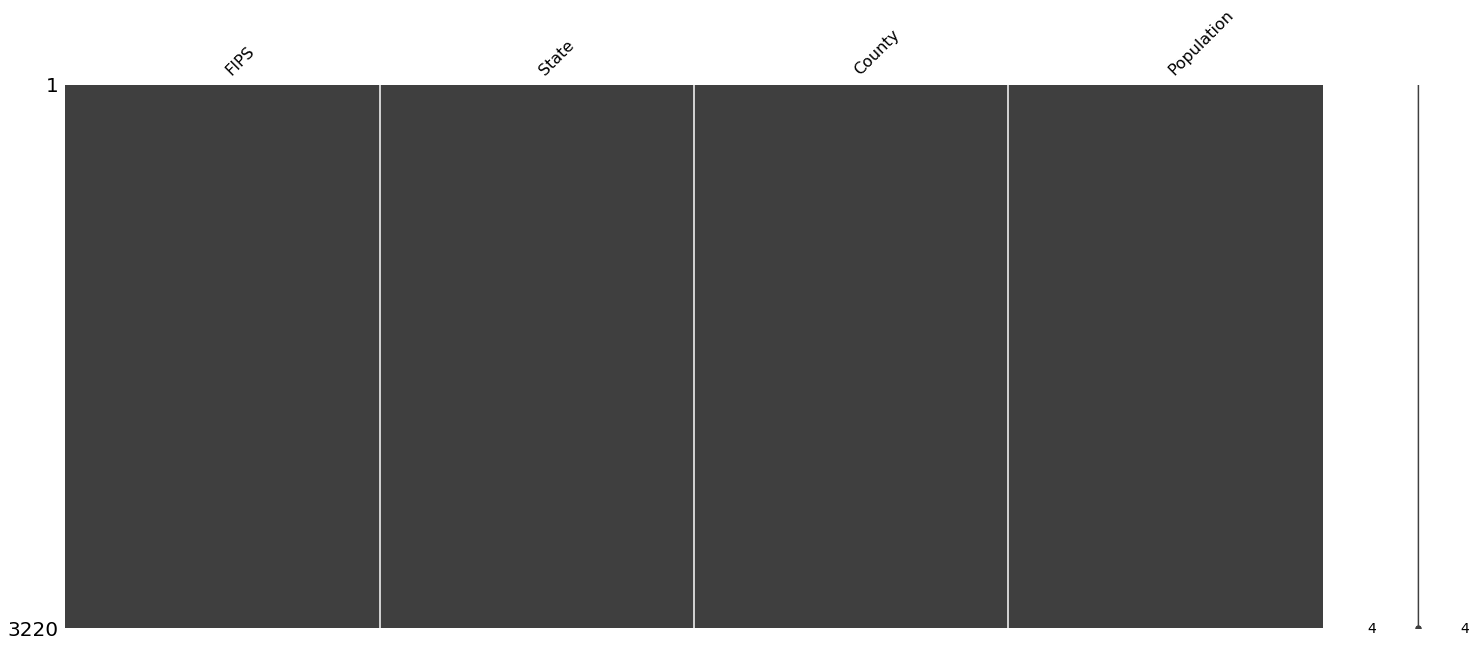

In [ ]:
msno.matrix(pop_df)

No missing data

### 1.4 - Verify Data Types

In [ ]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3220 entries, 0 to 3219
Data columns (total 4 columns):
FIPS          3220 non-null int64
State         3220 non-null object
County        3220 non-null object
Population    3220 non-null int64
dtypes: int64(2), object(2)
memory usage: 125.8+ KB


In [ ]:
pop_df.State.unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
       'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
       'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'PR'], dtype=object)

The expected 50 states plus Puerto Rico and Washington, DC are included in the study.

## 2 - Read Land Area Data

In [ ]:
url = 'https://www2.census.gov/library/publications/2011/compendia/usa-counties/excel/LND01.xls'
land_area_file = wget.download(url)

Read the land area data into a dataframe.

In [ ]:
land_area_df = pd.read_excel(land_area_file)
land_area_df.head(3)

,Areaname,STCOU,LND010190F,LND010190D,LND010190N1,LND010190N2,LND010200F,LND010200D,LND010200N1,LND010200N2,...,LND110210N1,LND110210N2,LND210190F,LND210190D,LND210190N1,LND210190N2,LND210200F,LND210200D,LND210200N1,LND210200N2
0,UNITED STATES,0,0,3787425.08,0,0,0,3794083.06,0,0,...,0,0,0,251083.35,0,0,0,256644.62,0,0
1,ALABAMA,1000,0,52422.94,0,0,0,52419.02,0,0,...,0,0,0,1672.71,0,0,0,1675.01,0,0
2,"Autauga, AL",1001,0,604.49,0,0,0,604.45,0,0,...,0,0,0,8.48,0,0,0,8.48,0,0


### 2.1 - Cleanup Columns

Reread the excel file and only keep the following columns of interest:
- STCOU - FIPS code for state or county
- Areaname - County and State
- LND110210D - Land area in square miles, 2010 SQM

In [ ]:
columns_of_interest = ['Areaname','STCOU','LND110210D']
land_area_df = pd.read_excel("LND01.xls", usecols=columns_of_interest, skiprows=0)
land_area_df.head()

,Areaname,STCOU,LND110210D
0,UNITED STATES,0,3531905.43
1,ALABAMA,1000,50645.33
2,"Autauga, AL",1001,594.44
3,"Baldwin, AL",1003,1589.78
4,"Barbour, AL",1005,884.88


In [ ]:
land_area_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 3 columns):
Areaname      3198 non-null object
STCOU         3198 non-null int64
LND110210D    3198 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 75.0+ KB


## 3 - Merge Population and Land Area Data

### 3-1 - Cleanup FIPS Codes

Compare FIPS codes before joining the dataframes to determine any anamolies.

In [ ]:
# Unique FIPS codes in the population data.
len(pop_df.FIPS.unique())

3220

In [ ]:
# Unique FIPS codes in the land area data for counties.
len(land_area_df.STCOU.unique())

3198

Inspect the different codes to determine if rows can be removed.

In [ ]:
# FIPS codes in the Population data but not in the Land Area data.
no_land_area_df = pop_df[~pop_df.FIPS.isin(land_area_df.STCOU.values)]
no_land_area_df.shape

(81, 4)

In [ ]:
no_land_area_df.sample(5)

,FIPS,State,County,Population
3169,72054,PR,"Florida Municipio, Puerto Rico",11317
3144,72005,PR,"Aguadilla Municipio, Puerto Rico",50265
3170,72055,PR,"Guánica Municipio, Puerto Rico",15383
3153,72023,PR,"Cabo Rojo Municipio, Puerto Rico",47515
3149,72015,PR,"Arroyo Municipio, Puerto Rico",17238


In [ ]:
print(no_land_area_df["State"].value_counts())

PR    79
AK     1
SD     1
Name: State, dtype: int64


In [ ]:
# FIPS codes in the land area data but not in the Population data.
no_pop_df = land_area_df[~land_area_df.STCOU.isin(pop_df.FIPS.values)]
no_pop_df.shape

(59, 3)

In [ ]:
no_pop_df

,Areaname,STCOU,LND110210D
0,UNITED STATES,0,3531905.43
1,ALABAMA,1000,50645.33
69,ALASKA,2000,570640.95
95,"Wade Hampton, AK",2270,17081.43
99,ARIZONA,4000,113594.08
115,ARKANSAS,5000,52035.48
191,CALIFORNIA,6000,155779.22
250,COLORADO,8000,103641.89
315,CONNECTICUT,9000,4842.36
324,DELAWARE,10000,1948.54


These records represent non-county or incomplete population or land area level data and can be dropped.

### 3.2 - Merge Dataframes

Perform inner join to combine the two dataframes eliminating both extraneous sets of data above.

In [ ]:
df = pop_df.merge(land_area_df, how="inner", left_on='FIPS', right_on='STCOU').drop(['STCOU', 'Areaname'], axis=1)
df.shape

(3139, 5)

Rename Columns

In [ ]:
df.rename(columns = {'LND110210D':'Land_Area'}, inplace = True)

In [ ]:
df.sample(5)

,FIPS,State,County,Population,Land_Area
1381,27139,MN,Scott County,149013,356.48
107,4023,AZ,Santa Cruz County,46498,1236.92
2668,48297,TX,Live Oak County,12207,1039.70
1964,37153,NC,Richmond County,44829,473.82
783,18177,IN,Wayne County,65884,401.74


In [ ]:
df.shape

(3139, 5)

### 3.3 - Cleanup Missing Data

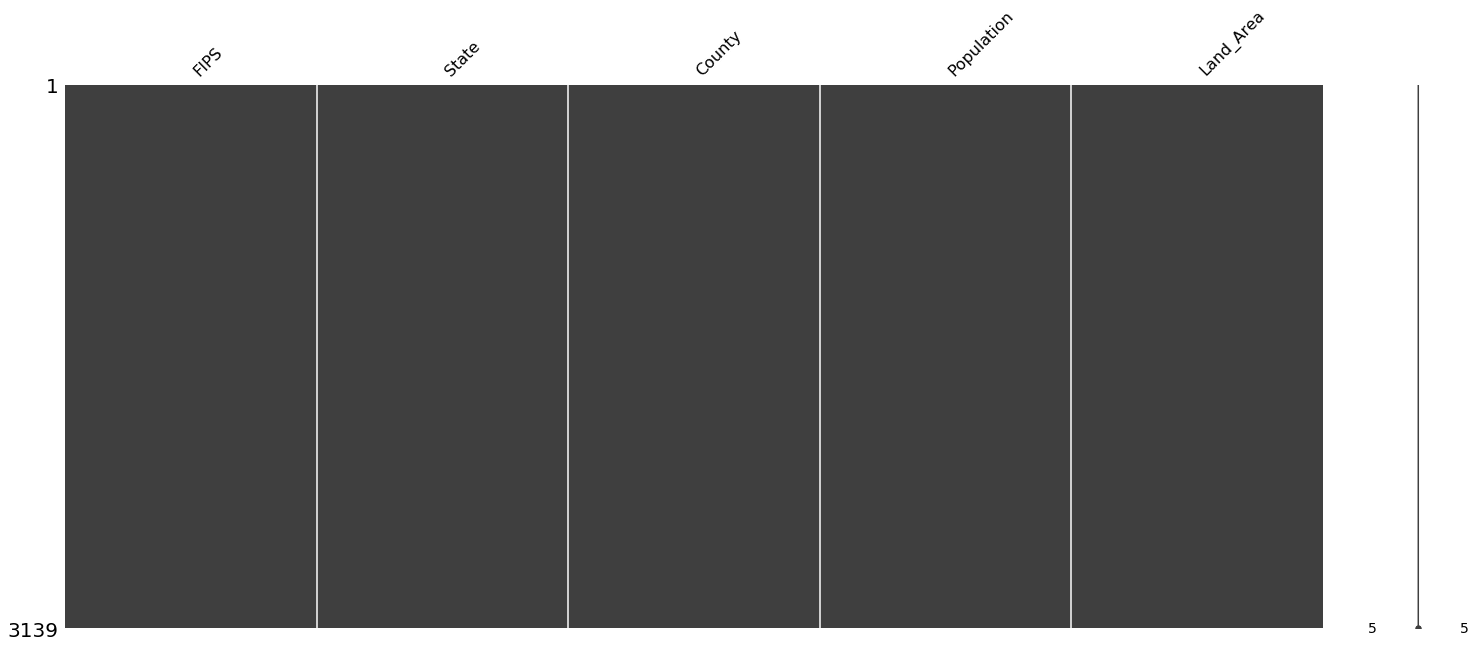

In [ ]:
msno.matrix(df)

No missing data.

### 3.4 - Function: ratio

Used to calculate ratios for the study such as "Population per square mile"


In [ ]:
def ratio(x, y):

    # Return ratio as an integer.
    return int(x / y)

Test the ratio function

In [ ]:
# pop_square_mile test (example - more population than square mileage)
ratio(10039107, 4057.88)

2473

In [ ]:
# pop_square_mile test (example - more square mileage than population)
ratio(169, 668.93) 

0

### 3.5 - Add Population Per Square Mile Column

Apply the ratio function to add "Population per Square Mile" column to each record

In [ ]:
df["Pop_Sq_Mile"] = df[["Population", "Land_Area"]].apply(lambda x: ratio(*x), axis=1)

In [ ]:
df.sample(3)

,FIPS,State,County,Population,Land_Area,Pop_Sq_Mile
2524,48009,TX,Archer County,8553,903.11,9
1015,21049,KY,Clark County,36263,252.46,143
2405,46093,SD,Meade County,28332,3470.98,8


Reorder columns

In [ ]:
df = df[['FIPS','County','State','Land_Area','Population','Pop_Sq_Mile']]
df.sample(3)

,FIPS,County,State,Land_Area,Population,Pop_Sq_Mile
165,5111,Poinsett County,AR,758.39,23528,31
2023,38071,Ramsey County,ND,1186.85,11519,9
1848,36045,Jefferson County,NY,1268.59,109834,86


### 3.6 Characterize Cleaned Data

Show the mean, min, and max for each variable in the dataframe.

In [ ]:
df.describe(include="all")

,FIPS,County,State,Land_Area,Population,Pop_Sq_Mile
count,3139.000000,3139,3139,3139.000000,3.139000e+03,3139.000000
unique,NaN,1874,50,NaN,NaN,NaN
top,NaN,Washington County,TX,NaN,NaN,NaN
freq,NaN,30,254,NaN,NaN,NaN
mean,30393.808538,NaN,NaN,1119.039105,1.043362e+05,268.768398
std,15154.834504,NaN,NaN,3602.323872,3.334350e+05,1775.239945
min,1001.000000,NaN,NaN,2.000000,8.600000e+01,0.000000
25%,18180.000000,NaN,NaN,430.915000,1.090400e+04,16.000000
50%,29177.000000,NaN,NaN,615.630000,2.575800e+04,44.000000
75%,45080.000000,NaN,NaN,923.665000,6.804750e+04,118.000000


### 4 - Plot Data

Display an interactive scatter plot of the population versus density by County.

In [ ]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe_connected'

In [ ]:
fig = px.scatter(df,x='Population', y='Pop_Sq_Mile',hover_data=['State','County'])
fig.update_layout(title="County Population versus Density", title_x=0.5)
fig.show()

### 5 - Save Population Density dataframe to Pickle File

In [ ]:
df.to_pickle("./population.pkl")